# Import Libraries

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sns

# Reading Data

In [23]:
df = pd.read_csv("C:/Users/PC/Desktop/Prodigy_Infotech_Data_Science_Internship/Decision_Tree/bank+marketing/bank-additional/bank-additional/bank-additional-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

### Shape

In [24]:
df.shape

(41188, 21)

### Columns

In [25]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

### Data Types Of the Columns

In [26]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### Checking for NA Values Per Column

In [27]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Distribution Of Target Variable

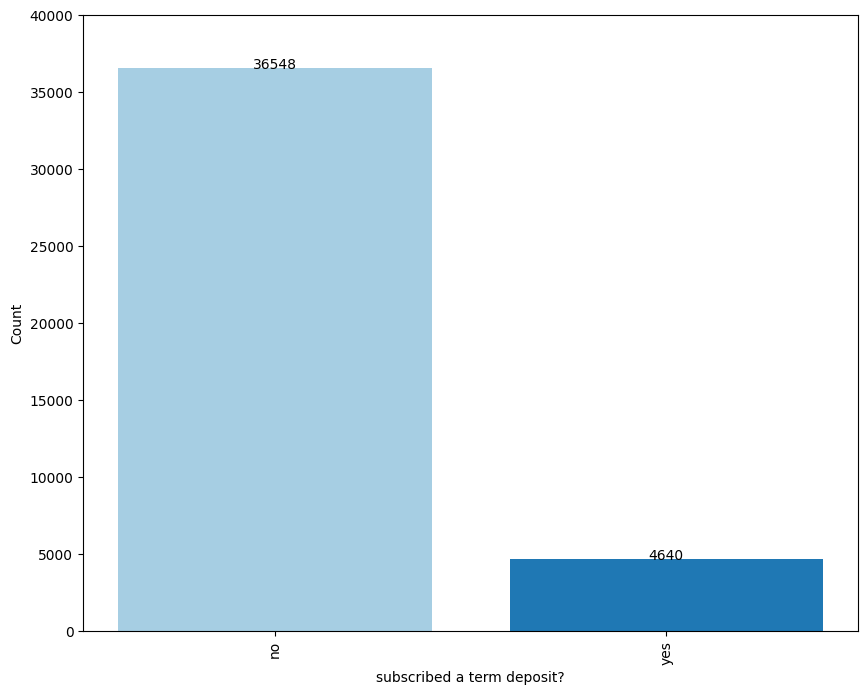

In [28]:
unique_lable = df["y"].value_counts()

plt.figure(figsize=(10, 8))
bars = plt.bar(unique_lable.index, unique_lable.values, color=plt.cm.Paired(range(len(unique_lable))))

for bar, count in zip(bars, unique_lable.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 5, str(count), ha='center', fontsize=10)

plt.ylabel('Count')
plt.xticks(rotation=90)
plt.xlabel('subscribed a term deposit?')
plt.ylim(0, 40000)
plt.show()

### Label Encoding

In [29]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Decision Tree Model Building

In [31]:
data_class_0 = df[df["y"] == 0]
data_class_1 = df[df["y"] == 1]

labels_class_0 = data_class_0.pop("y")
labels_class_1 = data_class_1.pop("y")

In [32]:
# Train-test split for class 0
train_features_0, temp_features_0, train_labels_0, temp_labels_0 = train_test_split(data_class_0, labels_class_0, test_size=0.5, random_state=42)
val_features_0, test_features_0, val_labels_0, test_labels_0 = train_test_split(temp_features_0, temp_labels_0, test_size=0.6, random_state=42)

# Train-test split for class 1
train_features_1, temp_features_1, train_labels_1, temp_labels_1 = train_test_split(data_class_1, labels_class_1, test_size=0.5, random_state=42)
val_features_1, test_features_1, val_labels_1, test_labels_1 = train_test_split(temp_features_1, temp_labels_1, test_size=0.6, random_state=42)

In [33]:
features_train = pd.concat([train_features_0, train_features_1], axis=0)
features_val = pd.concat([val_features_0, val_features_1], axis=0)
features_test = pd.concat([test_features_0, test_features_1], axis=0)

labels_train = pd.concat([train_labels_0, train_labels_1], axis=0)
labels_val = pd.concat([val_labels_0, val_labels_1], axis=0)
labels_test = pd.concat([test_labels_0, test_labels_1], axis=0)

In [34]:
classifier = DecisionTreeClassifier()
classifier.fit(features_train, labels_train)

train_predictions = classifier.predict(features_train)
accuracy_train = accuracy_score(labels_train, train_predictions)

validation_predictions = classifier.predict(features_val)
accuracy_val = accuracy_score(labels_val, validation_predictions)

test_predictions = classifier.predict(features_test)
accuracy_test = accuracy_score(labels_test, test_predictions)

In [35]:
print("Train Accuracy:", accuracy_train)
print("Validation Accuracy:", accuracy_val)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 1.0
Validation Accuracy: 0.8835741167900935
Test Accuracy: 0.8877559278141944


# Hyper-parameter Tuning

In [36]:
criterions = ['gini', 'entropy']
splitters = ['best', 'random']
max_depths = [None, 10, 20, 30, 40, 50]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]
max_features_options = [None, 'sqrt', 'log2']

best_accuracy = 0
best_params = {}

for criterion in criterions:
    for splitter in splitters:
        for max_depth in max_depths:
            for min_samples_split in min_samples_splits:
                for min_samples_leaf in min_samples_leafs:
                    for max_features in max_features_options:
                        classifier = DecisionTreeClassifier(
                            criterion=criterion,
                            splitter=splitter,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            random_state=42
                        )
                        
                        classifier.fit(features_train, labels_train)
                        
                        val_predictions = classifier.predict(features_val)
                        val_accuracy = accuracy_score(labels_val, val_predictions)
                        
                        if val_accuracy > best_accuracy:
                            best_accuracy = val_accuracy
                            best_params = {
                                'criterion': criterion,
                                'splitter': splitter,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf,
                                'max_features': max_features
                            }

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None}
Best Validation Accuracy: 0.9110112905183926


# Final Model

In [37]:
best_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_classifier.fit(features_train, labels_train)

train_predictions = best_classifier.predict(features_train)
train_accuracy = accuracy_score(labels_train, train_predictions)

val_predictions = best_classifier.predict(features_val)
val_accuracy = accuracy_score(labels_val, val_predictions)

test_predictions = best_classifier.predict(features_test)
test_accuracy = accuracy_score(labels_test, test_predictions)

print("Train Accuracy with Best Parameters:", train_accuracy)
print("Validation Accuracy with Best Parameters:", val_accuracy)
print("Test Accuracy with Best Parameters:", test_accuracy)


Train Accuracy with Best Parameters: 0.9255608429639701
Validation Accuracy with Best Parameters: 0.9110112905183926
Test Accuracy with Best Parameters: 0.9130857004127215


# Confusion Matrix

In [38]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_percent = conf_matrix / row_sums * 100
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, 
                linewidths=.5)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2f}%",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
            plt.text(j + 0.5, i + 0.65, f"{conf_matrix[i, j]}",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

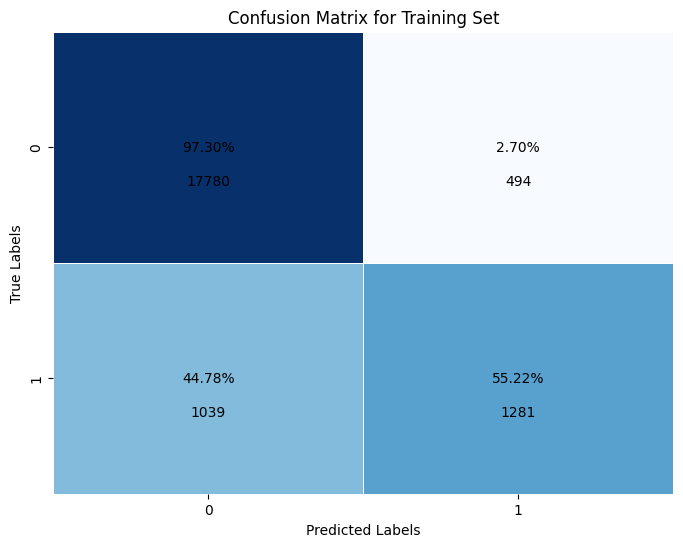

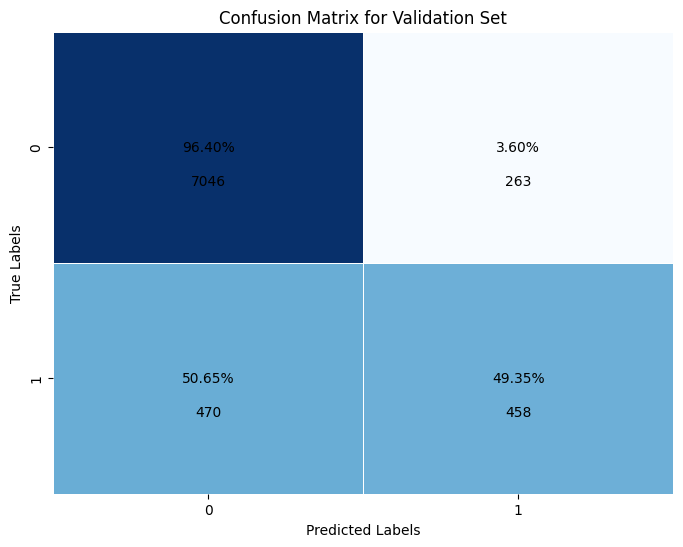

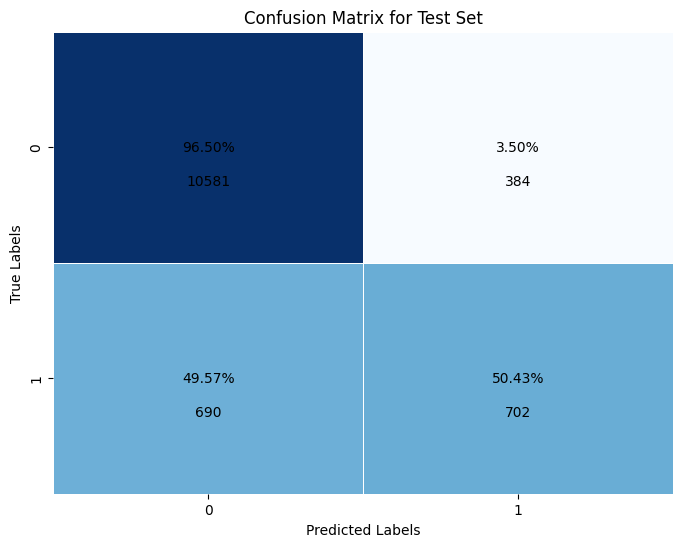

In [39]:
plot_confusion_matrix(labels_train, train_predictions, "Confusion Matrix for Training Set")
plot_confusion_matrix(labels_val, val_predictions, "Confusion Matrix for Validation Set")
plot_confusion_matrix(labels_test, test_predictions, "Confusion Matrix for Test Set")